In [1]:
from sympy import symbols, sin, cos
from sympy.physics.mechanics import dynamicsymbols, ReferenceFrame, init_vprinting
init_vprinting()
l_scalar = symbols('l')

In [2]:
theta_1_scalar, theta_2_scalar, x_scalar = dynamicsymbols('theta_1, theta_2, x')
x_scalar_dot = dynamicsymbols('x', 1)

In [3]:
N = ReferenceFrame('N')
A = ReferenceFrame('A')
B = ReferenceFrame('B')

In [4]:
A.orient(N, 'Axis', (theta_1_scalar, N.z))
A.ang_vel_in(N)

In [5]:
B.orient(A, 'Axis', (theta_2_scalar, A.z))
B.ang_vel_in(N)

In [6]:
from sympy.physics.mechanics import Point
O = Point('O')
Q = Point('Q')
P = Point('P')

In [7]:
Q.set_pos(O, l_scalar*A.y)

In [8]:
r_OQ_vector = Q.pos_from(O)
r_OQ_vector

In [9]:
P.set_pos(Q, x_scalar*B.y)
r_QP_vector = P.pos_from(Q)
r_QP_vector

In [10]:
r_OP_vector = r_OQ_vector + r_QP_vector
r_OP_vector

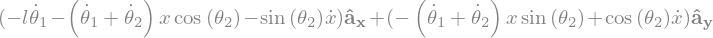

In [11]:
N_v_P_approach1 = r_OP_vector.dt(N)
N_v_P_approach1.express(A)

In [12]:
A_v_P_approach1 = r_QP_vector.dt(A)
A_v_P_approach1.express(A)

In [13]:
P.set_vel(B, x_scalar_dot*B.y)
B_v_P_vector = P.vel(B)
B_v_P_vector

In [14]:
O.set_vel(N, 0)
O.set_vel(A, 0)

In [15]:
N_v_O_vector = O.vel(N)

In [16]:
N_w_A_vector = A.ang_vel_in(N)

In [17]:
N_v_Q_vector = N_v_O_vector + N_w_A_vector.cross(r_OQ_vector)
N_v_Q_vector

In [18]:
N_w_B_vector = B.ang_vel_in(N)

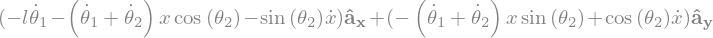

In [19]:
N_v_P_vector_approach2 = B_v_P_vector + N_v_Q_vector + N_w_B_vector.cross(r_QP_vector)
N_v_P_vector_approach2.express(A)

In [20]:
Q.set_vel(A, 0)
Q.set_vel(B, 0)
A_v_Q_vector = Q.vel(A)
A_v_Q_vector

In [21]:
A_w_B_vector = B.ang_vel_in(A)

In [22]:
A_v_P_vector_approach2 = B_v_P_vector + A_v_Q_vector + A_w_B_vector.cross(r_QP_vector)
A_v_P_vector_approach2.express(A)

In [23]:
A_v_P_vector_approach2.express(A) == A_v_P_approach1.express(A)

True